#  Elon Musk's Tweets Sentiment Analysis

## Introduction

Elon Musk's social media presence continued to captivate the world in 2022, which led to a huge increase in interest in sentiment analysis of his tweets. Elon Musk, the entrepreneurial genius and CEO of businesses including Tesla and SpaceX, is renowned for his unfiltered and frequently contentious tweets that have the ability to influence markets, spur innovation, and stoke discussions. Understanding the mood behind Musk's tweets can help us better understand how his statements affect investor sentiment, public perception, and broader market patterns. Researchers and analysts can shed light on the potential ramifications for many industries and stakeholders by analyzing the mood represented in Musk's tweets in order to find patterns, spot trends, and understand the emotions elicited by his comments.Through this analysis, we can examine the intricate interactions between social media, public opinion, and the sway that prominent individuals like Elon Musk have on the narrative and course of technological breakthroughs in 2022.

## About Dataset

### Context

Entrepreneur and investor Elon Musk is well-known. He founded The Boring Company, is the CEO and chief engineer of SpaceX, an angel investor in Tesla, Inc., the CEO and chief product architect, and a co-founder of Neuralink and OpenAI. Musk is the richest person in the world, according to both the Bloomberg Billionaires Index and Forbes' real-time billionaires list, with an estimated net worth of over $210 billion as of October 26, 2022.

### Content

This dataset contains information about tweets made by Elon Musk in 2022, including, besides the tweets, its number of likes, retweets and creation date.

- Tweets: original text of the tweet.
- Retweets: number of retweets of the current tweet.
- Likes: number of likes of the current tweet.
- Date: date of creation of the tweet.
- Cleaned_tweets: text of the tweet after removing 'RT', hashtags, hyperlinks, mentions, emojis, leading and trailing whitespaces.

## Data Prepation

### Importing librairies

In [16]:
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib.pyplot as plt # data visualization
import re
import datetime as dt # date time
from textblob import TextBlob #textblob  for sentiments
import seaborn as sns # data visualization

### Importing data

In [ ]:
df = pd.read_csv('cleandata.csv')

### Warnings suppression

In [11]:
import warnings
warnings.filterwarnings('ignore')

### Data Inspection

In [12]:
df.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


As you can see, a column in the dataframe contains tweets from Elon Musk, but they **have not been edited**. I'll demonstrate how to remove symbols, emojis, and other characters from the text in the part that follows.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweets          2668 non-null   object
 1   Retweets        2668 non-null   int64 
 2   Likes           2668 non-null   int64 
 3   Date            2668 non-null   object
 4   Cleaned_Tweets  2668 non-null   object
dtypes: int64(2), object(3)
memory usage: 104.3+ KB


### Data Cleaning

#### Creating a function to clean the tweets 


In [14]:
def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

#### Creating a new column with the cleaned tweets :

In [17]:
df['Cleaned_Tweets'] = df['Tweets'].apply(cleantwt)

In [18]:
df.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


#### Missing values check

In [22]:
df['Cleaned_Tweets'].isnull().sum()

0

#### Ducplicate values check

In [23]:
df.duplicated().sum()

0

We can now start the sentiment analysis.

## Sentiment Analysis

Polarity refers to the sentiment's strength, which can be positive or negative. When something evokes strong positive emotions like admiration, trust, or love, it exhibits a positive polarity. Conversely, negative polarities arise from strong negative emotions. For instance, consider the statement, "I don't think I'll buy this item because my previous experience with a similar item wasn't so good." This statement reflects a negative polarity.

Subjectivity refers to the level of personal involvement or perspective an individual has towards an object. It encompasses personal connections and individual experiences that may differ from others' viewpoints. For example, if someone says, "I'm very happy with my new smartphone because it has the highest performance available on the market," it demonstrates subjectivity. Here, the statement reflects the individual's personal experience and emotions towards the object.

With this understanding, the analysis can proceed by calculating the polarity and subjectivity of each tweet in the dataframe.

### Subjectivity and polarity extraction

In [24]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [25]:
#Create two new columns to save the results of the created functions 
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [26]:
# Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [27]:
# Create a new column 'Sentiment'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [28]:
df.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.2000,Positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.90,0.2000,Positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,0.0000,Neutral
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.65,0.4375,Positive
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.00,0.0000,Neutral


Our columns have been successfully created.

### Data Visualization

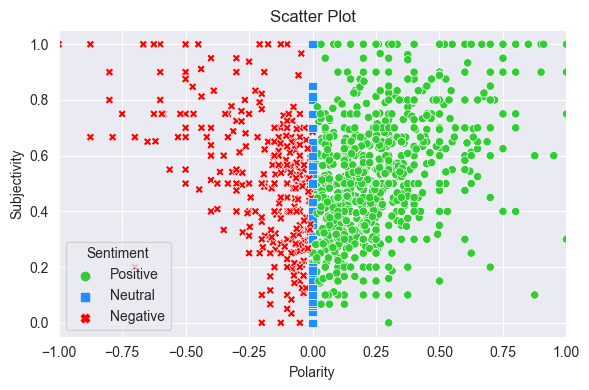

In [39]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (6,4))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

custom_palette = {'Positive': 'limegreen', 'Neutral': 'dodgerblue', 'Negative': 'red'}

sns.scatterplot(data=df, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = custom_palette).set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

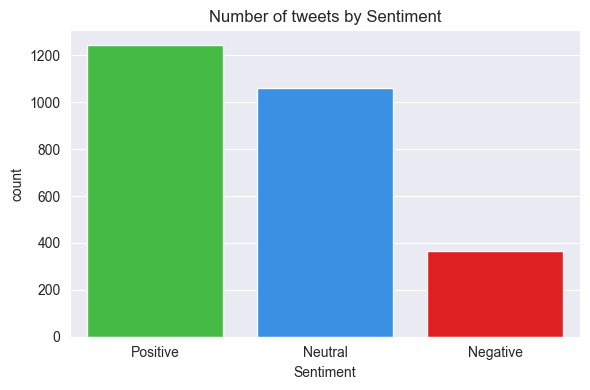

In [43]:
# Create a bar chart to count tweets according to its sentiment value
plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='Sentiment', palette=custom_palette.values())
plt.title('Number of tweets by Sentiment')

plt.tight_layout()
plt.show()


Based on the data analysis, it is evident that a significant majority of Elon Musk's tweets exhibit a high degree of subjectivity, with a prevailing perception of positivity or neutrality.

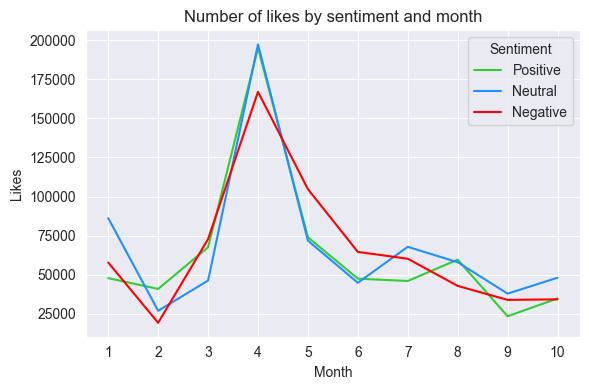

In [44]:
# Creating month column for time analysis
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Creating a plot to show number of likes depending on sentiment through time

plt.figure(figsize = (6, 4))

months = df['Month'].unique()

sns.lineplot(x = 'Month', y = 'Likes', hue = 'Sentiment', ci = None, data = df, palette = custom_palette)
plt.title('Number of likes by sentiment and month')
plt.xlabel('Month')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

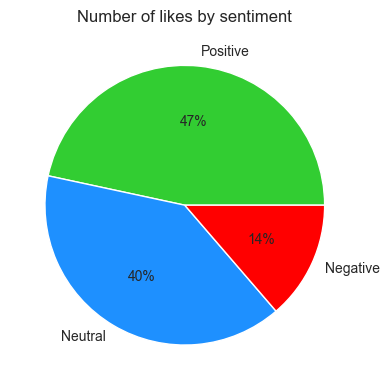

In [47]:
plt.figure(figsize=(8, 4))

data = df['Sentiment'].value_counts()
colors = [custom_palette[sentiment] for sentiment in data.index]
labels = ['Positive', 'Neutral', 'Negative']

plt.pie(data, labels=labels, autopct='%.0f%%', colors=colors)
plt.title('Number of likes by sentiment')

plt.tight_layout()
plt.show()

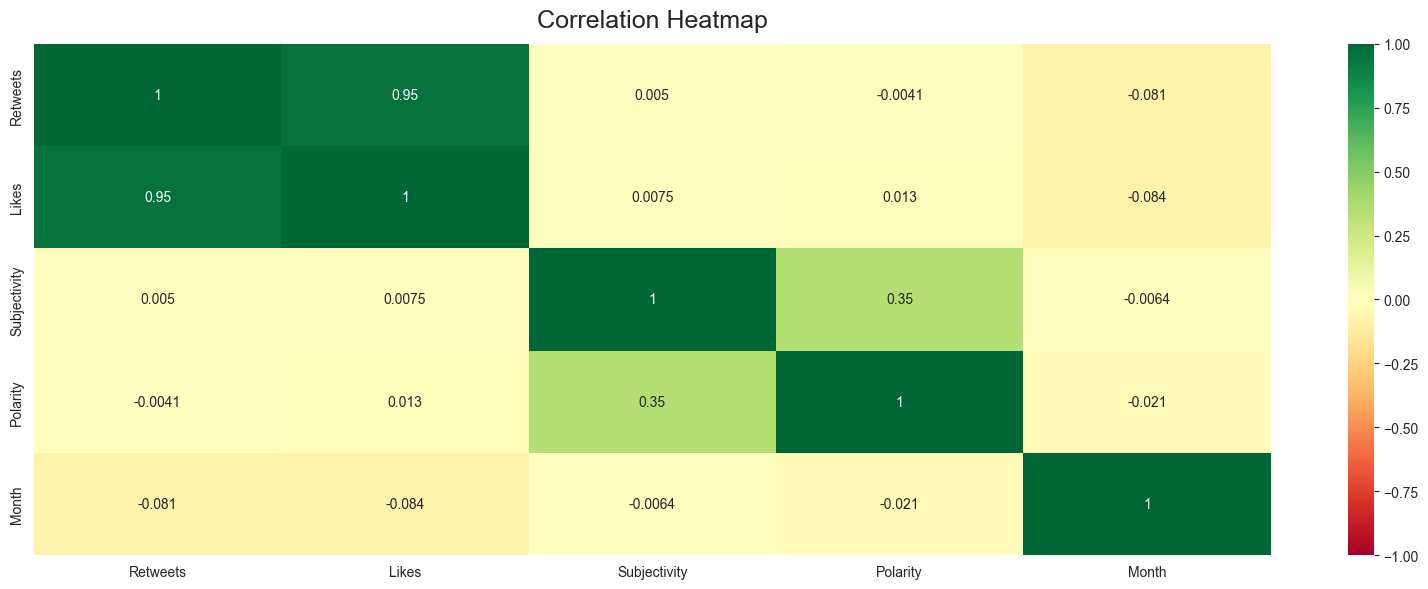

In [51]:
# Create correlation matrix to see correlation coefficients between sets of variables
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()
plt.show()


It appears that there is a robust positive linear association between likes and retweets. Conversely, subjectivity and polarity demonstrate a mild positive correlation.

## Conclusion

Based on the data analysis, it is evident that the majority of Elon Musk's tweets exhibit a high degree of subjectivity, which can be linked to their polarity. There exists a slight relationship between these variables, suggesting that higher subjectivity tends to correspond to a greater polarity, resulting in a more positive sentiment.

Furthermore, a noteworthy finding is the strong correlation between likes and retweets. The data indicates that as the number of likes increases, the number of retweets also tends to increase, and vice versa. However, it is important to note that this correlation does not imply a causal relationship between the variables.

Interestingly, there seems to be no significant relationship between the number of likes and the sentiment variable in the tweets. Despite a low degree of correlation, the analysis reveals that the number of likes remained relatively consistent throughout the year, regardless of the sentiment expressed in the text.

In summary, the data highlights the prevalence of subjective tweets from Elon Musk and their association with polarity. It also emphasizes the strong correlation between likes and retweets, while indicating that sentiment does not significantly impact the number of likes received.